In [1]:
#데이터 분석
import pandas as pd
import numpy as np

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 회귀분석 및 rmse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math  import sqrt

#모델 평가
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer


In [2]:
df =  pd.read_csv('/content/medical.csv')
df = df.reset_index(drop=False)
del df['DM_DX_YN']
df.columns = ['FBS',	'TTL_CHOL',	'LDL_CHOL',	'HDL_CHOL',	'TG',	'HB',	'HBA1C', 'BS',
              'AGE','GENDER',	'HT', 'WT',	'WST_CIR',	'SBP',	'DBP',	'BMI',	'DM_DX_YN']
display(df)

,FBS,TTL_CHOL,LDL_CHOL,HDL_CHOL,TG,HB,HBA1C,BS,AGE,GENDER,HT,WT,WST_CIR,SBP,DBP,BMI,DM_DX_YN
0,100,279,183,40,422,15.8,5.3,183,53,2,149.7,58.2,76,130,80,25.97,0
1,129,197,133,53,121,13.7,7.3,265,52,1,170.6,69.6,88,123,78,23.91,1
2,87,259,165,47,227,16.0,5.8,144,58,1,171.6,69.5,85,110,80,23.60,1
3,112,241,146,65,180,14.5,6.1,209,54,2,150.9,60.3,89,150,100,26.48,1
4,97,195,109,40,196,16.6,5.5,243,55,1,162.0,58.7,81,110,70,22.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,132,223,148,42,320,16.7,7.7,331,61,1,166.9,72.4,99,150,90,25.99,1
232,92,105,44,25,176,12.3,3.9,129,57,1,164.7,57.0,79,130,90,21.01,0
233,124,225,119,68,150,13.4,6.6,331,70,2,151.4,56.8,88,140,90,24.78,1
234,94,218,134,43,94,11.9,5.3,171,64,2,145.2,41.9,69,130,70,19.87,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FBS       236 non-null    int64  
 1   TTL_CHOL  236 non-null    int64  
 2   LDL_CHOL  236 non-null    int64  
 3   HDL_CHOL  236 non-null    int64  
 4   TG        236 non-null    int64  
 5   HB        236 non-null    float64
 6   HBA1C     236 non-null    float64
 7   BS        236 non-null    int64  
 8   AGE       236 non-null    int64  
 9   GENDER    236 non-null    int64  
 10  HT        236 non-null    float64
 11  WT        236 non-null    float64
 12  WST_CIR   236 non-null    int64  
 13  SBP       236 non-null    int64  
 14  DBP       236 non-null    int64  
 15  BMI       236 non-null    float64
 16  DM_DX_YN  236 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 31.5 KB


In [4]:
df.describe()

,FBS,TTL_CHOL,LDL_CHOL,HDL_CHOL,TG,HB,HBA1C,BS,AGE,GENDER,HT,WT,WST_CIR,SBP,DBP,BMI,DM_DX_YN
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,104.754237,202.317797,118.961864,44.940678,172.487288,14.230085,6.059322,209.682203,55.440678,1.567797,159.169068,61.912712,83.368644,125.724576,81.567797,24.418771,0.343220
std,33.452650,40.237231,33.807884,11.084428,126.626019,1.580165,1.226914,86.905259,8.297698,0.496435,8.873126,9.870912,9.008490,17.381465,11.109114,3.240861,0.475793
min,62.000000,105.000000,39.000000,21.000000,34.000000,8.600000,3.900000,63.000000,39.000000,1.000000,141.400000,38.900000,58.000000,90.000000,50.000000,16.240000,0.000000
25%,86.000000,173.000000,96.750000,37.000000,94.000000,13.275000,5.300000,142.750000,48.000000,1.000000,152.075000,54.800000,77.000000,110.000000,70.000000,22.367500,0.000000
50%,93.000000,201.500000,117.000000,43.000000,145.500000,14.300000,5.650000,192.000000,54.000000,2.000000,158.950000,61.250000,83.500000,125.000000,80.000000,24.170000,0.000000
75%,110.250000,227.000000,139.250000,51.000000,217.250000,15.400000,6.425000,266.250000,63.000000,2.000000,165.600000,68.125000,89.000000,140.000000,90.000000,26.120000,1.000000
max,258.000000,379.000000,240.000000,83.000000,1117.000000,17.700000,11.300000,479.000000,72.000000,2.000000,182.200000,93.100000,104.000000,183.000000,110.000000,34.700000,1.000000


In [5]:
df.isnull().sum()

FBS         0
TTL_CHOL    0
LDL_CHOL    0
HDL_CHOL    0
TG          0
HB          0
HBA1C       0
BS          0
AGE         0
GENDER      0
HT          0
WT          0
WST_CIR     0
SBP         0
DBP         0
BMI         0
DM_DX_YN    0
dtype: int64

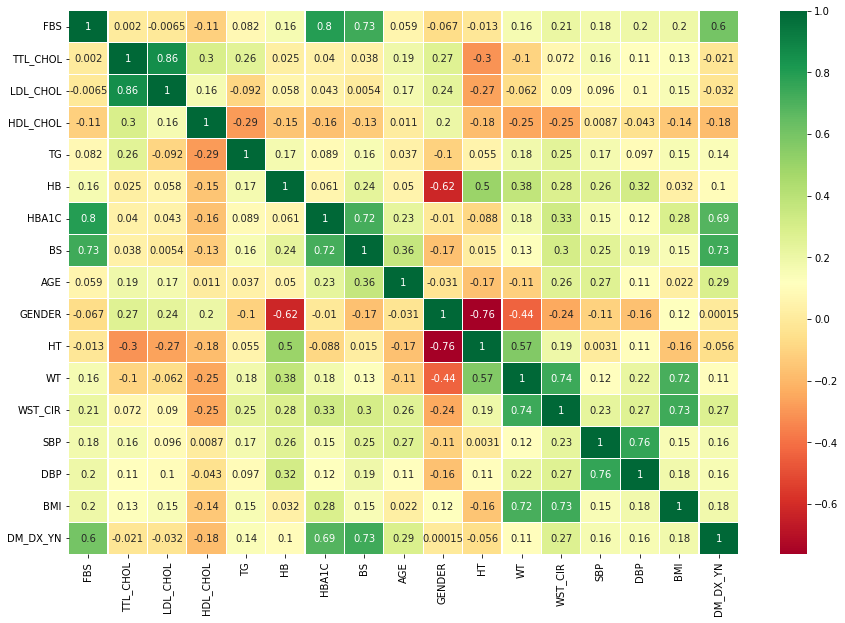

In [6]:
#각 데이터들 간에 어떤 연관성이 있는지 상관계수를 통해 파악
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)#실제값 화면에 나타도록 annot = True, 색상은 red,yellow,green으로 표현 
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

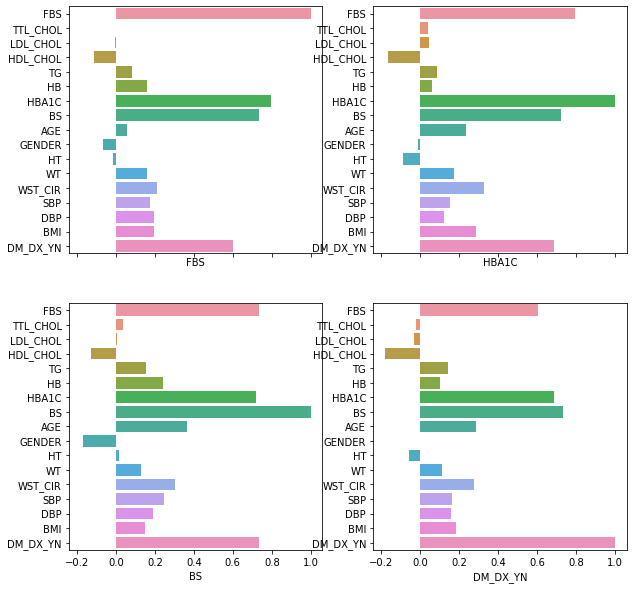

In [7]:
f, axes = plt.subplots(2,2, figsize=(10,10), sharex = True)
sns.barplot(x=corr.FBS, y=corr.columns, ax = axes[0,0])
sns.barplot(x=corr.HBA1C, y=corr.columns, ax = axes[0,1])
sns.barplot(x=corr.BS, y=corr.columns, ax = axes[1,0])
sns.barplot(x=corr.DM_DX_YN, y=corr.columns, ax = axes[1,1])



**TG(중성지방)는 대부분 상관관계가 낮다** -> sns.barplot(x=corr.BS, y=corr.columns)로 알 수 있음

1.   DM_DX_YN(당뇨 판정
2.   HBA1C(당화혈 색소)
3.   BS(혈당)

**DM_DX_YN(당뇨 판정)은 FBS와 HBA1C, BS와 뚜렷한 상관관계를 띄는 것을 확인할 수 있다.**


**반대로 TTL_CHOL, LDL_CHOL, HDL_CHOL, HT와는 음의 상관관계를 띰**


DM_DX_YN : 0 = 정상, 1= 당뇨

FBS : 공복혈당이 100~125이면 당뇨 전단계인 '공복 혈당장애'로 판단

126이상이면 '당뇨'로 진단

In [20]:
fbs = df.FBS.tolist()
dm = df.DM_DX_YN.tolist()
a = [] #fbs가 100~125사이-> 당뇨 O
b = [] #fbs가 100~125 사이 -> 당뇨 X
c = [] #fbs가 126이상 -> 당뇨 O
d = [] #fbs가 126이상 -> 당뇨 X
e = [] #fbs가 100미만 -> 당뇨 O
f = [] #fbs가 100미만 -> 당뇨 X
for i in range(len(fbs)):
  if fbs[i] <100 and dm[i]==1:#fbs가 100미만 -> 당뇨 O
    e.append(i)#숫자 추가
  elif fbs[i] < 100 and dm[i] == 0 : #fbs가 100미만 -> 당뇨X
    f.append(i)
  elif fbs[i] >=100 and fbs[i] <=125 and dm[i] == 1 : #fbs가 100~125사이-> 당뇨 O
    a.append(i)
  elif fbs[i] >=100 and fbs[i] <=125 and dm[i] == 0 : #fbs가 100~125 사이 -> 당뇨 X
    b.append(i)
  elif fbs[i] >=126 and dm[i] == 1 : #fbs가 126이상 -> 당뇨O
    c.append(i)
  elif fbs[i] >=126 and dm[i] == 0 : #fbs가 126이상 -> 당뇨 X
    d.append(i)
print('fbs가 100~125사이-> 당뇨 판정 O :', len(a))
print('\nfbs가 100~125 사이 -> 당뇨 판정 X :',len(b))
print('\nfbs가 126이상 -> 당뇨 판정 O : ',len(c))
print('\nfbs가 126이상 -> 당뇨 판정 X:',len(d))
print('\nfbs가 100미만 -> 당뇨 판정 O  :',len(e))
print('\nfbs가 100미만 -> 당뇨 판정 X  :',len(f))

fbs가 100~125사이-> 당뇨 판정 O : 28

fbs가 100~125 사이 -> 당뇨 판정 X : 18

fbs가 126이상 -> 당뇨 판정 O :  35

fbs가 126이상 -> 당뇨 판정 X: 2

fbs가 100미만 -> 당뇨 판정 O  : 18

fbs가 100미만 -> 당뇨 판정 X  : 135


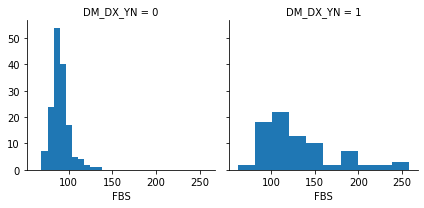

In [21]:
#FBS분포에 따른 DM_DX_YN살펴보기
grid = sns.FacetGrid(df,col='DM_DX_YN') 
grid.map(plt.hist,'FBS',bins=10) 
plt.show()

당뇨병이 아닌 환자는 거의 대부분 FBS(공복혈당수치)가 낮은 부분에 위치해 있고 당뇨병인 환자는 대부분 FBS가 100이상으로 넓게 분포하고 있음을 확인할 수 있다. 


In [10]:
#GENDER : 남성 = 1, 여성 = 2
df.groupby(['GENDER','DM_DX_YN'])['DM_DX_YN'].count()

GENDER  DM_DX_YN
1       0           67
        1           35
2       0           88
        1           46
Name: DM_DX_YN, dtype: int64

남성의 경우 정상인 사람의 수가 당뇨병에 걸린 사람의 수보다 많다.

여자도 정상인 사람의 수가 많다. 

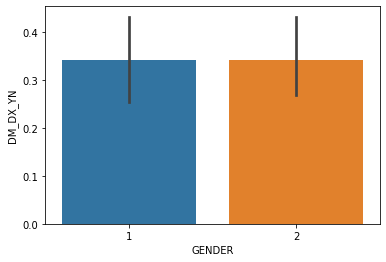

In [11]:
#시각화
sns.barplot(x='GENDER',y='DM_DX_YN', data = df)

In [12]:
#예측 모델 평가하기
x = df.drop(['DM_DX_YN'], axis = 1)
y = df['DM_DX_YN']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=121)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print('[선형 회귀]')
print('train데이터의 R2 score :\n', model.score(X_train, y_train))   #train R2 score
print('test데이터의 R2 score :\n',model.score(X_test, y_test))  #test R2 score
#train 점수가 test 점수에 비해 높다면 과적합
#test 점수가 train 점수에 비해 높으므로 과적합이 아니다. 
#RMSE SCORE비교
print('')
y_predictions = lr.predict(X_train)
print('train데이터 RMSE : \n', sqrt(mean_squared_error(y_train, y_predictions))) #0.2969009957549277
y_predictions = lr.predict(X_test)
print('test데이터 RMSE : \n',sqrt(mean_squared_error(y_test, y_predictions))) #0.283625572821049

[선형 회귀]
train데이터의 R2 score :
 0.6103088537773885
test데이터의 R2 score :
 0.6380044049886934

train데이터 RMSE : 
 0.2969009957549277
test데이터 RMSE : 
 0.283625572821049


In [13]:
#5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로  RMSE를 측정

x = df.drop(['DM_DX_YN'], axis = 1)
y = df['DM_DX_YN']
lr = LinearRegression()
cross_val_rmse5 = cross_val_score(lr, x,y,scoring="neg_mean_squared_error", cv = 5)
rmse5 = np.sqrt(-1*cross_val_rmse5)
print('[선형 회귀 교차 검증]')
print('cv 5일 때 rmse 평균 \n', np.mean(rmse5))
print('')
cross_val_rmse10 = cross_val_score(lr, x,y,scoring="neg_mean_squared_error", cv = 10)
rmse10 = np.sqrt(-1*cross_val_rmse10)
print('cv = 10일 때 교차 검증 rmse 평균\n ',np.mean(rmse10))
#cv가 5일대 rmse가 낮다. 따라서 cv가 10일 때 예측이 다소 정확하다는 것을 알 수 있다. 

[선형 회귀 교차 검증]
cv 5일 때 rmse 평균 
 0.32191713873804584

cv = 10일 때 교차 검증 rmse 평균
  0.3106579789130802


In [14]:
#DecisionTreeRegressor(결정 트리)
dtr = DecisionTreeRegressor()
cross_val_dtc5 = cross_val_score(dtr, x, y,scoring="neg_mean_squared_error", cv =5)
rmse = np.sqrt(-1*cross_val_dtc5)
print('[결정 트리 교차 검증]')
print('cv = 5일 때 결정 트리 rmse 평균 \n ',np.mean(rmse))

cross_val_dtc10 = cross_val_score(dtr, x, y,scoring="neg_mean_squared_error", cv =10)
rmse = np.sqrt(-1*cross_val_dtc10)
print('cv = 10 일 때 결정 트리 rmse 평균\n ',np.mean(rmse))

[결정 트리 교차 검증]
cv = 5일 때 결정 트리 rmse 평균 
  0.37406159772478204
cv = 10 일 때 결정 트리 rmse 평균
  0.3671876453152599


In [15]:
#RandomForestRegressor(랜덤 포레스트)
rfr = RandomForestRegressor()
cross_val_rfr = cross_val_score(rfr, x, y,scoring="neg_mean_squared_error", cv =5)
rmse = np.sqrt(-1*cross_val_rfr)

print('[랜덤 포레스트 교차 검증]')
print('cv = 5일 때 랜덤 포레스트 rmse 평균 \n ', np.mean(rmse))

[랜덤 포레스트 교차 검증]
cv = 5일 때 랜덤 포레스트 rmse 평균 
  0.2964456453396133


In [16]:
def evaluation(y_test, pred):
  confusion = confusion_matrix(y_test,  pred)
  accuracy = accuracy_score(y_test,  pred)
  precision = precision_score(y_test,  pred)
  recall = recall_score(y_test,  pred)
  f1 =f1_score(y_test, pred)
  roc = roc_auc_score(y_test, pred)
  print('오차 행렬\n',confusion)
  print('정확도 : {0:.4f}, 재현율 : {1:.4f}, 정밀도 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall,f1,roc))

In [17]:
x = df.drop(['DM_DX_YN',], axis = 1)
y = df['DM_DX_YN']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=121)
lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('[로지스틱 회귀 평가]')
evaluation(y_test, pred)

[로지스틱 회귀 평가]
오차 행렬
 [[29  3]
 [ 1 15]]
정확도 : 0.9167, 재현율 : 0.8333, 정밀도 : 0.9375, F1 : 0.8824, AUC : 0.9219


In [18]:
x = df[['FBS', 'HBA1C', 'BS']]#상관관계가 높은 피처
y = df['DM_DX_YN']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=121)
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('상관관계가 높은 피처들을 대상으로 평가')
evaluation(y_test, pred)

print('')

x = df[['TTL_CHOL', 'LDL_CHOL', 'HDL_CHOL']]#상관관계가 낮은 피처
y = df['DM_DX_YN']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=121)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('상관관계가 낮은 피처들을 대상으로 평가')
evaluation(y_test, pred)

상관관계가 높은 피처들을 대상으로 평가
오차 행렬
 [[30  2]
 [ 1 15]]
정확도 : 0.9375, 재현율 : 0.8824, 정밀도 : 0.9375, F1 : 0.9091, AUC : 0.9375

상관관계가 낮은 피처들을 대상으로 평가
오차 행렬
 [[32  0]
 [16  0]]
정확도 : 0.6667, 재현율 : 0.0000, 정밀도 : 0.0000, F1 : 0.0000, AUC : 0.5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# 상관관계가 좋은 피처들을 대상으로 로지스틱 회귀를 적용해 성능 평가 지표 확인
# 임계값
x = df[['FBS', 'HBA1C', 'BS']]
y = df['DM_DX_YN']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=121)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]#1열이 positive 칼럼

thresholds = [i /10 for i in range(3,9,1)] #반복문을 통한 임계값 설정
# 평가지표를 조사하기 위한 새로운 함수 생성
def threshold(y_test, pred_proba, thresholds):
    for th in thresholds:
        binarizer = Binarizer(threshold=th).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('\n임계값: ', th)
        evaluation(y_test, custom_predict)
threshold(y_test, pred_proba.reshape(-1, 1), thresholds)


임계값:  0.3
오차 행렬
 [[27  5]
 [ 0 16]]
정확도 : 0.8958, 재현율 : 0.7619, 정밀도 : 1.0000, F1 : 0.8649, AUC : 0.9219

임계값:  0.4
오차 행렬
 [[29  3]
 [ 1 15]]
정확도 : 0.9167, 재현율 : 0.8333, 정밀도 : 0.9375, F1 : 0.8824, AUC : 0.9219

임계값:  0.5
오차 행렬
 [[30  2]
 [ 1 15]]
정확도 : 0.9375, 재현율 : 0.8824, 정밀도 : 0.9375, F1 : 0.9091, AUC : 0.9375

임계값:  0.6
오차 행렬
 [[30  2]
 [ 1 15]]
정확도 : 0.9375, 재현율 : 0.8824, 정밀도 : 0.9375, F1 : 0.9091, AUC : 0.9375

임계값:  0.7
오차 행렬
 [[31  1]
 [ 1 15]]
정확도 : 0.9583, 재현율 : 0.9375, 정밀도 : 0.9375, F1 : 0.9375, AUC : 0.9531

임계값:  0.8
오차 행렬
 [[31  1]
 [ 3 13]]
정확도 : 0.9167, 재현율 : 0.9286, 정밀도 : 0.8125, F1 : 0.8667, AUC : 0.8906
